In [1]:
import os
import pdfplumber
import pandas as pd
import matplotlib.pyplot as plt
file_dir ="C:\Users\金路云的女人\Desktop\2019"
file_list=[]
for files in os.walk(file_dir):
    for file in files[2]:
        if os.path.splitext(file)[1] == '.pdf' or os.path.splitext(file)[1] == '.PDF':
            file_list.append(file_dir+'\\'+file)
print(file_list)
All_company= {}
for i in range(0,10):
    pdf = pdfplumber.open(file_list[i])
    pages = pdf.pages[0:9]
    text_all = ' '
    for page in pages:
        text = page.extract_text()
        text_all.join(text)
        s = text.find('一、公司信息')
        e = text.find('二、联系人和联系方式')
        ss = text.find('五、主要会计数据和财务指标')
        ee = text.find('六、分季度主要财务指标')
        if s !=-1 and e !=-1:
            first = (text[s:e])
        if ss !=-1 and ee !=-1:
            second = (text[ss:ee])
    company = {}
    company['股票简称'] = first[first.find('股票简称')+4:first.find('股票代码')].strip('\n').strip(' ')
    company['股票代码'] = first[first.find('股票代码')+4:first.find('公司的中文名称')].strip('\n').strip(' ')
    company['公司的法定代表人'] = first[first.find('公司的法定代表人')+8:first.find('注册地址')].strip('\n').strip(' ')
    company['办公地址'] = first[first.find('办公地址')+4:first.find('办公地址的邮政编码')].strip('\n').strip(' ')
    company['公司网址'] = first[first.find('网网址')+3:first.find('电子信箱')].strip('\n').strip(' ')
    company['电子信箱'] = first[first.find('电子信箱')+4:].strip('\n').strip(' ')
    aim = second[second.find('营业收入'):second.find('归属于上市公司股东的净利润')].strip('\n').split()
    company['营业收入_2017'] = aim[-1]
    company['营业收入_2018'] = aim[int(len(aim)/2)]
    company['营业收入_2019']= aim[1]
    All_company['第{}家公司'.format(i+1)] = company
    print(company)
    pdf.close()
    print('完成第{}份'.format(i+1))
print('完成所有提取')
print(All_company)
pd.DataFrame(All_company)
def draw_line(s,e):
    Llist = []
    for i in range(s,e):
        a = All_company['第{}家公司'.format(i + 1)]['营业收入_2017']
        b = All_company['第{}家公司'.format(i + 1)]['营业收入_2018']
        c= All_company['第{}家公司'.format(i + 1)]['营业收入_2019']
        plt.title(' Operating Revenue')
        y = [a,b,c]
        x = ['2017','2018','2019']
        plt.plot(x,y)
        Llist.append(All_company['第{}家公司'.format(i + 1)]['股票简称'])
    plt.legend(Llist)
    plt.rcParams['font.sans-serif'] = ['SimHei']
    plt.show()
draw_line(0,10)



{'股票简称': '恒信东方', '股票代码': '300081', '公司的法定代表人': '孟宪民', '办公地址': '北京市海淀区蓝靛厂南路牛顿办公区北区11层', '公司网址': 'http://www.hxgro.com/', '电子信箱': 'office@hxgro.com', '营业收入_2017': '414,396,876.31', '营业收入_2018': '697,723,347.65', '营业收入_2019': '546,414,932.58'}
完成第1份
{'股票简称': '华中数控', '股票代码': '300161', '公司的法定代表人': '陈吉红', '办公地址': '武汉市东湖开发区华工科技园', '公司网址': 'www.huazhongcnc.com', '电子信箱': 'hcnc@hzncc.com', '营业收入_2017': '985,192,133.80', '营业收入_2018': '819,575,843.82', '营业收入_2019': '906,039,496.44'}
完成第2份
{'股票简称': '方直科技', '股票代码': '300235', '公司的法定代表人': '黄元忠', '办公地址': '深圳市南山区大新路198号创新大厦B座9楼', '公司网址': 'www.kingsunedu.com', '电子信箱': 'kingsunsoft@kingsunsoft.com', '营业收入_2017': '100,510,607.42', '营业收入_2018': '107,245,103.63', '营业收入_2019': '109,014,398.01'}
完成第3份
{'股票简称': '华录百纳', '股票代码': '300291', '公司的法定代表人': '方刚', '办公地址': '北京市朝阳区安家楼50号院A7-2', '公司网址': 'http://www.hlbn.cc/', '电子信箱': 'hbndsh@hlbn.cc', '营业收入_2017': '2,247,623,728.70', '营业收入_2018': '629,521,249.35', '营业收入_2019': '611,431,097.94'}
完成第4份
{'股票简称': '普丽盛', '股票代码':

<Figure size 640x480 with 1 Axes>

In [2]:
pd.DataFrame(All_company)


第1家公司                第2家公司  \
公司的法定代表人                     孟宪民                  陈吉红   
公司网址       http://www.hxgro.com/  www.huazhongcnc.com   
办公地址       北京市海淀区蓝靛厂南路牛顿办公区北区11层        武汉市东湖开发区华工科技园   
电子信箱            office@hxgro.com       hcnc@hzncc.com   
股票代码                      300081               300161   
股票简称                        恒信东方                 华中数控   
营业收入_2017         414,396,876.31       985,192,133.80   
营业收入_2018         697,723,347.65       819,575,843.82   
营业收入_2019         546,414,932.58       906,039,496.44   

                                 第3家公司                第4家公司             第5家公司  \
公司的法定代表人                           黄元忠                   方刚               姜卫东   
公司网址                www.kingsunedu.com  http://www.hlbn.cc/    www.cn-pls.com   
办公地址             深圳市南山区大新路198号创新大厦B座9楼    北京市朝阳区安家楼50号院A7-2  上海市金山区张堰镇金张支路84号   
电子信箱       kingsunsoft@kingsunsoft.com       hbndsh@hlbn.cc    pls@cn-pls.com   
股票代码                            300235               300291            300442   
股票简称                              方直科技                 华录百纳               普丽盛   
营业收入_2017               100,510,607.42     2,247,623,728.70    694,225,978.93   
营业收入_2018               107,245,103.63       629,521,249.35    579,549,995.56   
营业收入_2019               109,014,398.01       611,431,097.94    640,060,243.46   

                               第6家公司                        第7家公司  \
公司的法定代表人                          葛航                           陈栗   
公司网址       https://www.bsoft.com.cn/  http://www.cendes-arch.com/   
办公地址        杭州市滨江区长河街道越达巷92号创业智慧大厦五楼       成都市锦江区东大街芷泉段6号1栋1单元37层   
电子信箱              bsoft@bsoft.com.cn   cendes.bso@cendes-arch.com   
股票代码                          300451                       300492   
股票简称                            创业慧康                         山鼎设计   
营业收入_2017             694,225,978.93               149,941,000.43   
营业收入_2018             579,549,995.56               215,946,744.36   
营业收入_2019             640,060,243.46               213,738,816.56   

                       第8家公司                     第9家公司                  第10家公司  
公司的法定代表人                 高光荣                       王岳钧                     蒋小平  
公司网址       www.eoptolink.com  http:// www.xgpharma.com  http://www.omnijoi.com  
办公地址       成都市双流区公兴镇物联西街127号         浙江省嵊州市剡湖街道环城西路25号          南京市栖霞区元化路8号28幢  
电子信箱        ir@eoptolink.com          xgpharma@163.com       board@omnijoi.com  
股票代码                  300502                    300519                  300528  
股票简称                     新易盛                      新光药业                    幸福蓝海  
营业收入_2017     877,365,361.78            310,865,113.13        1,517,230,070.94  
营业收入_2018     759,950,284.50            276,257,365.69        1,654,823,836.35  
营业收入_2019   1,164,873,682.36            291,262,099.70        2,138,087,936.10

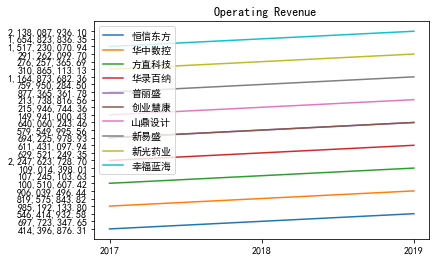

In [4]:
draw_line(0,10)